# Supervised Learning - Naive Bayes

<p style="font-size:16px">In this Notebook, We go over some of the Naive Bayes basic definitions and formulas. The workflow of the notbook is explained. Following preprocessing steps and some evaluation metrics. Two Naive Bayes Classifiers were used. The MultinomialNB classifier had the better performance.   </p>

### Achieved Accuracy: 98.8% 


## Formula:
$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

## Example: Spam filters
## $P(Spam | email) = P(Spam | \vec{w}) = \frac{P(spam) \cdot P(\vec{w} | Spam)}{P(spam)\:\cdot \: P(\vec{w}|Spam)\:\cdot \: P(not \:Spam)\: \cdot \: P(\vec{w} | not \:spam)}$

### Terminolgy
Priors --> P(spam)  
Likelihood --> P(spam | $\vec{w}$) and other | terms 
Evidence --> The lower term of the formula $P(spam)\:\cdot \: P(\vec{w}|Spam)\:\cdot \: P(not \:Spam)\: \cdot \: P(\vec{w} | not \:spam)$

## Preprocessing (aka Featurising)
<ol style="font-size:16px">
    <li>Tokenization: splitting the words </li>
    <li>Stop words removal</li>
    <li>Remove non-alphabetical charachters.</li>
    <li>Stemming: keeping the root of the word but stripping things like ing, ed etc. More for large data</li>
    <li>Lemmatization: Alternative to stemming by assinging to the same root. more taxing of resources than stemming</li>
    <li>Lowercasing: could be bad in cases where the name turns into a verb like "Mark" and "mark"</li>

</ol>

## There are 2 phases in the Classifer workflow:

<ol style="font-size:16px">
    <li>Learning phase: splitting the data into training and testing data</li>
    <li>Evaluation phase: testing the classifier performance using key metrics.
        Given that TP/FP is True/False Positive, TN/FN True/False Negative:
        <ol> 
            <li>Accuracy: ratio of correctly predicted observation to the total observations
            $$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$</li>
            <li>Precision: is the ratio of correctly predicted positive observations to the total predicted positive observations:
            $$Precision = \frac{TP}{TP + FP}$$</li>
            <li>Recall or Sensitivity: the ratio of correctly predicted positive observations to the all observations in actual class 
            $$Recall = \frac{TP}{TP+FN}$$</li>
        </ol>
    </li>
</ol>

## Building Naive Bayes Classifer

In [151]:
# library imports
import numpy as np 
import pandas as pd 
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt



## Exploratory Data Analysis

In [44]:
# reading data
df = pd.read_csv("data/spam.csv",encoding = "ISO-8859-1")
df = df[["v1", "v2"]]

In [45]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [47]:
# checking unique values on v1
print("Number of Unique Values: \n", df['v1'].value_counts(),'\n\n')

# value percentage
print("Value Percentage: \n",df['v1'].value_counts() * 100 / len(df['v1']))

Number of Unique Values: 
 ham     4825
spam     747
Name: v1, dtype: int64 


Value Percentage: 
 ham     86.593683
spam    13.406317
Name: v1, dtype: float64


## Preprocessing

<ol style="font-size:16px">
    <li>Tokenization: splitting the words </li>
    <li>Stop words removal</li>
    <li>Remove non-alphabetical charachters.</li>
    <li>Stemming: keeping the root of the word but stripping things like ing, ed etc. More for large data</li>
    <li>Lemmatization: Alternative to stemming by assinging to the same root. more taxing of resources than stemming</li>
    <li>Lowercasing: could be bad in cases where the name turns into a verb like "Mark" and "mark"</li>

</ol>

In [48]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [49]:
ps = PorterStemmer()

In [50]:
stop_words = stopwords.words("english")
print(len(stop_words))
print(stop_words[:10])

153
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']


In [51]:
# # 1. Tokenization
# df['tokens'] = df.v2.str.split(" ")
# df.head()

In [55]:
def remove_stopwords(text):
    """Function to replace stopords with an empty space and removes double spaces
    removing all chars other then alphabet and stemming words
    
    returns: corpus of stemmed words"""

    text = re.sub('^a-zA-Z',' ',text)
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text).replace('  ', ' ')
    return text


In [56]:
df["removed_stopwords"]= df.v2.apply(remove_stopwords)

In [57]:
df

,v1,v2,removed_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. avail bugi n great wo..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... joke wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win FA cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,U dun say earli hor... U c alreadi say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah I don't think goe usf, live around though"
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,thi 2nd time tri 2 contact u. U å£750 pound pr...
5568,ham,Will Ì_ b going to esplanade fr home?,will Ì_ b go esplanad fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...","pity, * mood that. so...ani suggestions?"
5570,ham,The guy did some bitching but I acted like i'd...,the guy bitch I act like i'd interest buy some...


In [58]:
# vecotrizing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2500)


In [73]:
X = cv.fit_transform(df.removed_stopwords).toarray()
print(X.shape)

(5572, 2500)


In [120]:
# target
y = pd.get_dummies(df.v1, drop_first=True)
print(y.shape)

(5572, 1)


In [121]:
y = np.array(y)
print(y.shape)

(5572, 1)


In [122]:
print(y)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


## Modeling

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=False)

In [125]:
X_train.shape

(4457, 2500)

In [126]:
gauss_clf = GaussianNB()
multi_clf = MultinomialNB()

In [137]:
gauss_clf.fit(X_train, y_train)
multi_clf.fit(X_train, y_train)

/Users/spydermac/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/spydermac/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [138]:
gauss_pred = gauss_clf.predict(X_test)
multi_pred = multi_clf.predict(X_test)

## Evaluation 

In [139]:
score_gauss = accuracy_score(gauss_pred, y_test)
score_multi = accuracy_score(multi_pred, y_test)
print(f"GaussNB Accuracy Score: {score_gauss*100:.2f}%")
print(f"MultinomialNB Accuracy Score: {score_multi*100:.2f}%")

GaussNB Accuracy Score: 86.55%
MultinomialNB Accuracy Score: 98.83%


In [142]:
average_precision_gauss = average_precision_score(y_test, gauss_pred)
average_precision_multi = average_precision_score(y_test, multi_pred)

print(f"Avg Precision for GaussianNB: {average_precision_gauss:.2f}")
print(f"Avg Precision for MultinomialNB: {average_precision_multi:.2f}")

Avg Precision for GaussianNB: 0.46
Avg Precision for MultinomialNB: 0.92


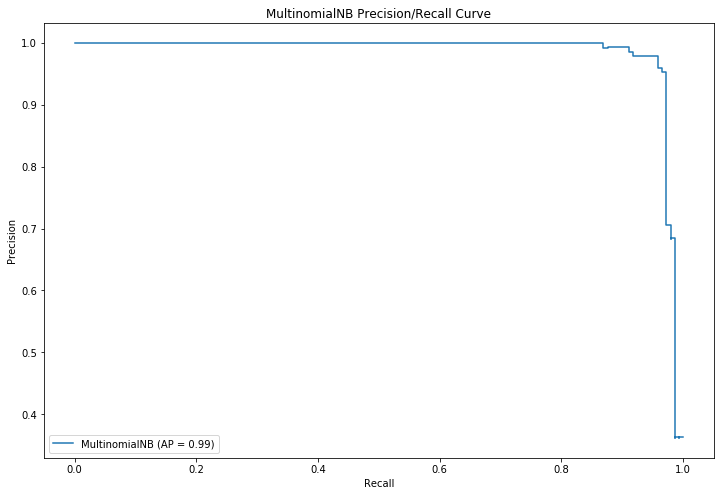

In [162]:
# plotting the MultinomialNB Precision
fig, ax = plt.subplots(figsize=(12,8))
curve = plot_precision_recall_curve(multi_clf, X_test, y_test, ax=ax)
curve.ax_.set_title("MultinomialNB Precision/Recall Curve");
